In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df= pd.read_csv('Fashion_Retail_Sales.csv')
df.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash


In [39]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer Reference ID  3400 non-null   int64         
 1   Item Purchased         3400 non-null   object        
 2   Purchase Amount (USD)  2750 non-null   float64       
 3   Date Purchase          3400 non-null   datetime64[ns]
 4   Review Rating          3400 non-null   float64       
 5   Payment Method         3400 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 159.5+ KB


Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating              0
Payment Method             0
dtype: int64

In [40]:
print(df.columns)

Index(['Customer Reference ID', 'Item Purchased', 'Purchase Amount (USD)',
       'Date Purchase', 'Review Rating', 'Payment Method'],
      dtype='object')


In [41]:
#Filling missing review ratings with mean
df['Review Rating']=df['Review Rating'].fillna(df["Review Rating"].mean())

In [42]:
#Converting date column 
df['Date Purchase']= pd.to_datetime(df['Date Purchase'])

In [43]:
#Removing duplicate rows
df= df.drop_duplicates()

In [44]:
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating              0
Payment Method             0
dtype: int64


In [48]:
#Extracting month from purchase date
df["Month"]=df["Date Purchase"].dt.month

In [49]:
#Exploratory Analysis

In [50]:
#Most Purchased Items
df['Item Purchased'].value_counts()

Item Purchased
Belt             90
Skirt            88
Shorts           87
Pants            86
Tank Top         82
T-shirt          82
Pajamas          81
Camisole         76
Loafers          76
Hoodie           75
Poncho           73
Socks            73
Kimono           73
Blouse           73
Wallet           73
Handbag          72
Cardigan         72
Vest             71
Sneakers         71
Onesie           71
Backpack         71
Blazer           71
Umbrella         70
Raincoat         69
Trench Coat      68
Hat              68
Sunglasses       67
Coat             67
Scarf            66
Swimsuit         66
Boots            65
Jacket           64
Romper           64
Flannel Shirt    63
Leggings         62
Sweater          62
Overalls         61
Tunic            61
Polo Shirt       59
Gloves           59
Jeans            58
Slippers         58
Trousers         58
Jumpsuit         57
Dress            57
Tie              57
Sandals          54
Bowtie           52
Flip-Flops       51
Sun H

In [53]:
#Average Purchase Amount per item
avg_purchase_by_item=(
    df.groupby('Item Purchased')['Purchase Amount (USD)']
    .mean()
    .sort_values(ascending=False)
)
print("\nAverage Purchase Amount per Item:")
print(avg_purchase_by_item)


Average Purchase Amount per Item:
Item Purchased
Tunic            319.907407
Flip-Flops       275.829268
Jeans            272.250000
Slippers         245.304348
Gloves           237.115385
Boots            228.673077
Handbag          214.711864
Sweater          213.137255
Pajamas          209.803279
Bowtie           197.840909
Romper           197.104167
Poncho           190.366667
Blazer           184.907407
Swimsuit         184.204082
Blouse           183.719298
Loafers          183.416667
Trench Coat      178.428571
Shorts           171.648649
Leggings         165.040816
Onesie           161.847458
Trousers         161.450000
Jacket           157.980000
Wallet           156.200000
Scarf            155.508475
Hoodie           154.500000
Cardigan         151.967213
Belt             151.942029
Kimono           149.672131
T-shirt          143.539683
Socks            136.152542
Pants            130.915493
Tank Top         125.696970
Raincoat         123.218182
Sandals          118.53191

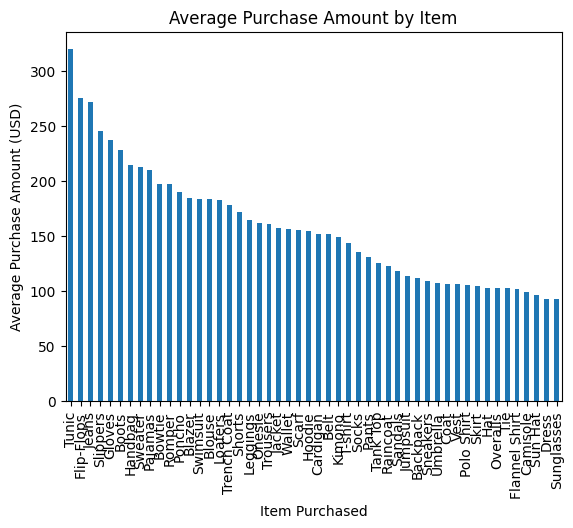

In [54]:
#Visualization
plt.figure()
avg_purchase_by_item.plot(kind="bar")
plt.title("Average Purchase Amount by Item")
plt.xlabel("Item Purchased")
plt.ylabel("Average Purchase Amount (USD)")
plt.show()

In [55]:
df['Payment Method'].value_counts()

Payment Method
Credit Card    1770
Cash           1630
Name: count, dtype: int64

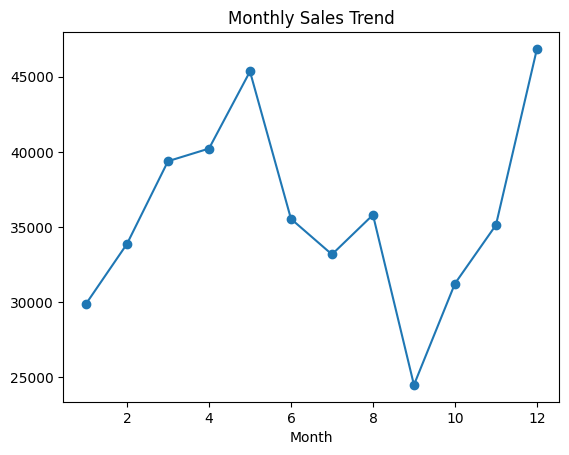

In [59]:
#Monthly Sales Trend
df['Month']=df ['Date Purchase'].dt.month
monthly_sales=df.groupby('Month')['Purchase Amount (USD)'].sum()
monthly_sales.plot(kind='line',  marker= 'o', title='Monthly Sales Trend')
plt.show()

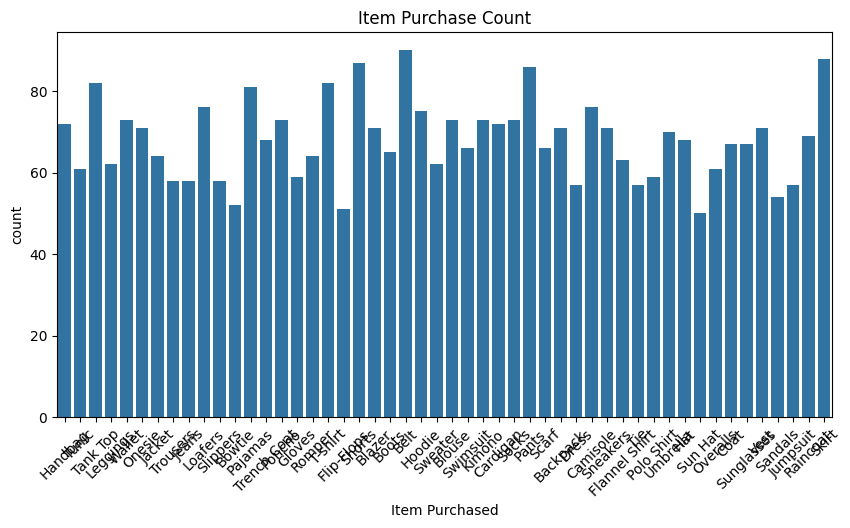

In [57]:
#Item Purchase Count Visualization
plt.figure(figsize=(10,5))
sns.countplot(x='Item Purchased', data=df)
plt.title('Item Purchase Count')
plt.xticks(rotation=45)
plt.show()

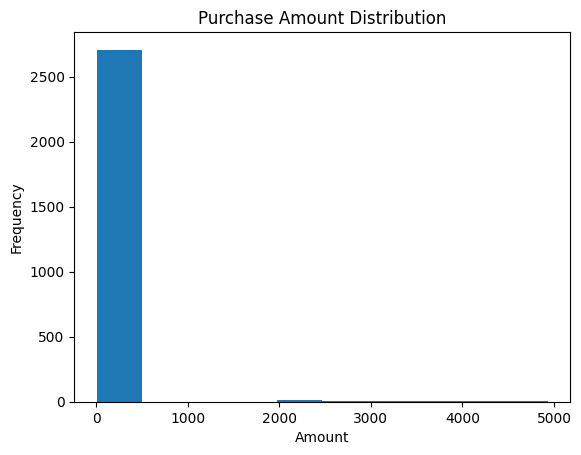

In [58]:
#Purchase Amount Distribution
plt.hist(df['Purchase Amount (USD)'], bins=10)
plt.title('Purchase Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

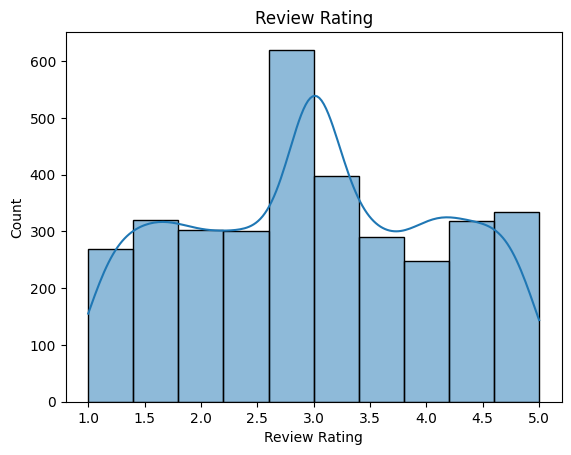

In [61]:
#Review Rating Distribution
plt.figure()
sns.histplot(df["Review Rating"], bins=10, kde=True)
plt.title("Review Rating")
plt.show()